In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# replace the path of the excel file below and run other cells
df = pd.read_excel('/content/drive/MyDrive/Deep craft/stock_price.xlsx')

In [30]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort the DataFrame by the 'Date' column in ascending order
df = df.sort_values(by='Date', ascending=True)

# Reset the index after sorting (optional, for clean indexing)
df.reset_index(drop=True, inplace=True)

# Check if the dates are now in ascending order
print(df.head())  # This will show the earliest dates (1988 onwards)
print(df.tail())  # This will show the most recent dates (up to 2024)

        Date  Closing Price  Open Price  High price  Low price   Volume  \
0 1987-02-12          182.4       182.4       182.4      182.4    1.28B   
1 1987-02-13          172.5       176.5       176.5      172.5  422.38M   
2 1987-02-16          175.5       166.7       175.5      165.7  360.51M   
3 1987-02-17          182.4       176.5       184.3      175.5  881.51M   
4 1987-02-18          191.2       186.3       191.2      186.3  795.09M   

   Change %  
0    0.1625  
1   -0.0543  
2    0.0174  
3    0.0393  
4    0.0482  
           Date  Closing Price  Open Price  High price  Low price   Volume  \
9197 2024-07-26          157.9       159.3       159.6      157.9  155.08M   
9198 2024-07-29          159.7       158.7       160.2      158.4  126.28M   
9199 2024-07-30          158.7       158.8       159.2      158.0  138.14M   
9200 2024-07-31          160.4       158.2       160.7      158.1  173.91M   
9201 2024-08-01          156.3       159.3       159.4      156.1   79.15M 

In [31]:
# Handle volume data with both 'M' (millions) and 'B' (billions)
df['Volume'] = df['Volume'].replace({'M': 'e6', 'B': 'e9'}, regex=True).astype(float)

In [32]:
# Generate basic statistics for numerical columns
basic_stats = df.describe()
print(basic_stats)


                                Date  Closing Price   Open Price   High price  \
count                           9202    9202.000000  9202.000000  9202.000000   
mean   2005-10-21 08:44:04.642468992      92.180961    92.256183    93.176451   
min              1987-02-12 00:00:00      33.000000    33.000000    33.200000   
25%              1996-06-06 06:00:00      52.000000    52.100000    52.800000   
50%              2005-10-11 12:00:00      85.100000    85.100000    86.050000   
75%              2015-03-04 18:00:00     110.800000   110.800000   111.900000   
max              2024-08-01 00:00:00     305.900000   309.800000   311.800000   
std                              NaN      50.452228    50.598215    51.049837   

         Low price        Volume     Change %  
count  9202.000000  9.202000e+03  9202.000000  
mean     91.330146  1.726677e+08     0.000175  
min      32.200000  9.340000e+06    -0.147400  
25%      51.500000  8.073000e+07    -0.009400  
50%      84.200000  1.540150e+

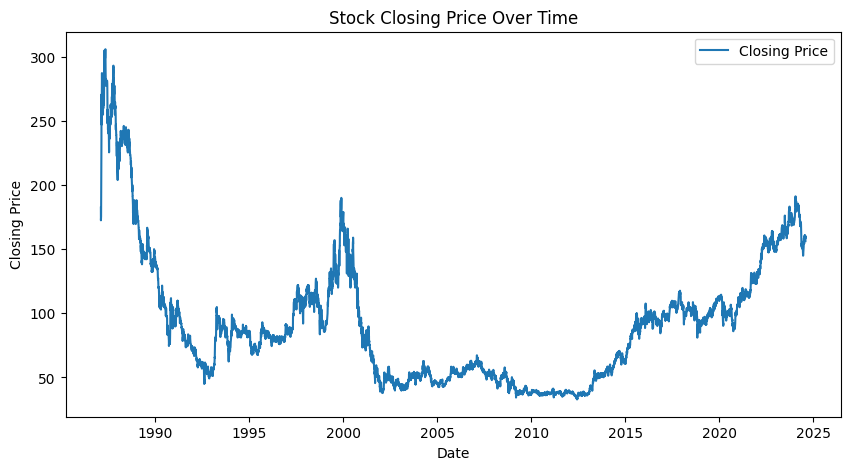

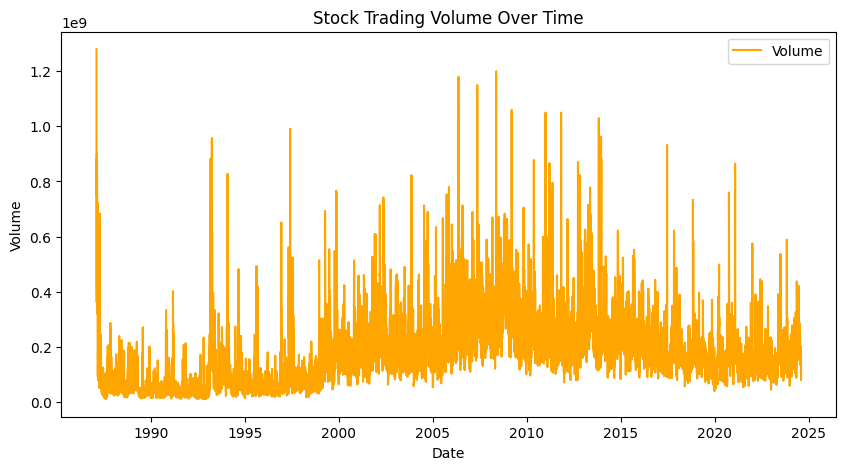

In [33]:
import matplotlib.pyplot as plt

# Plot the closing price over time
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Closing Price'], label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Stock Closing Price Over Time')
plt.legend()
plt.show()

# Plot the trading volume over time
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Volume'], label='Volume', color='orange')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Stock Trading Volume Over Time')
plt.legend()
plt.show()

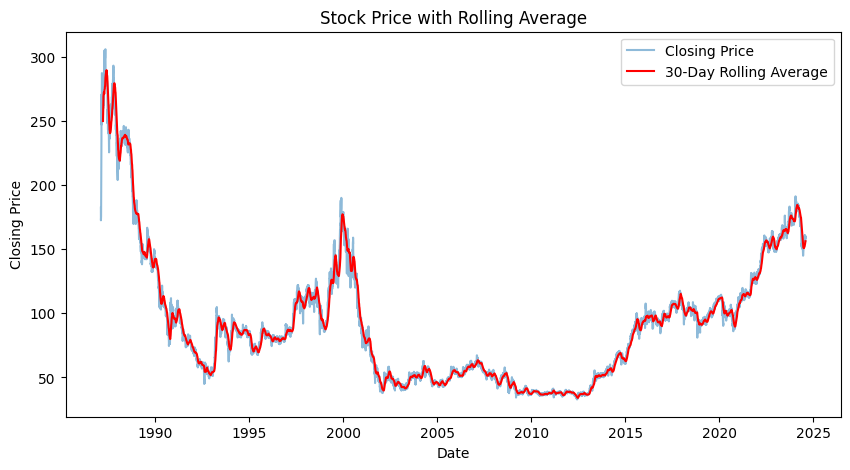

In [34]:
# Rolling average to smooth out the data and observe trends
df['Rolling_Close'] = df['Closing Price'].rolling(window=30).mean()

# Plot the rolling average
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Closing Price'], label='Closing Price', alpha=0.5)
plt.plot(df['Date'], df['Rolling_Close'], label='30-Day Rolling Average', color='red')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Stock Price with Rolling Average')
plt.legend()
plt.show()


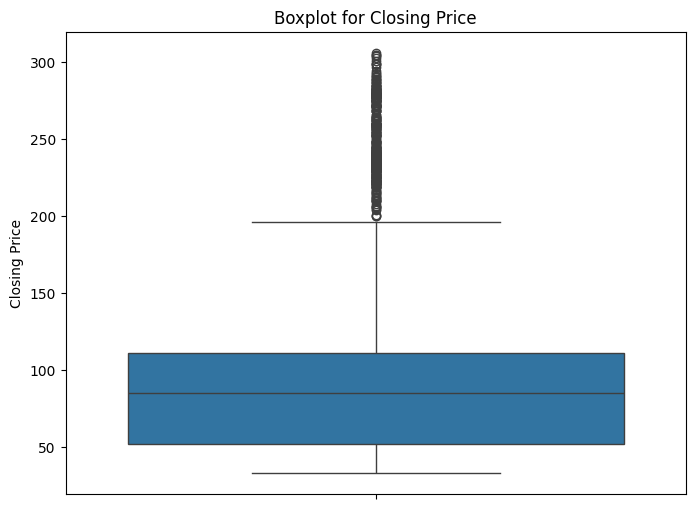

          Date  Closing Price  Open Price  High price  Low price       Volume  \
8   1987-02-24          270.6       258.8       272.5      257.8  605420000.0   
9   1987-02-25          252.9       258.8       262.7      252.0  733930000.0   
10  1987-02-26          247.1       256.9       261.8      243.1  349450000.0   
11  1987-02-27          253.9       250.0       262.7      244.1  347710000.0   
12  1987-03-02          263.7       265.7       267.6      259.8  320110000.0   
..         ...            ...         ...         ...        ...          ...   
301 1988-04-28          244.1       240.2       246.1      239.2  238640000.0   
302 1988-05-02          246.1       247.1       248.0      246.1  146810000.0   
328 1988-06-10          244.1       244.1       246.1      242.2  224550000.0   
329 1988-06-13          245.1       245.1       248.0      244.1  127740000.0   
330 1988-06-14          244.1       245.1       246.1      242.2   45140000.0   

     Change %  Rolling_Clos

In [35]:


# Boxplot to detect outliers in Closing Price
plt.figure(figsize=(8, 6))
sns.boxplot(df['Closing Price'])
plt.title('Boxplot for Closing Price')
plt.show()

# Z-score for outlier detection
from scipy import stats
df['Z_Score'] = stats.zscore(df['Closing Price'])
outliers = df[df['Z_Score'].abs() > 3]  # Threshold of Z-score 3
print(outliers)


In [36]:
# Checking for missing values in the dataset
missing_values = df.isnull().sum()
print(missing_values)


Date              0
Closing Price     0
Open Price        0
High price        0
Low price         0
Volume            0
Change %          0
Rolling_Close    29
Z_Score           0
dtype: int64


In [37]:
### Feature Engineering
# Moving Averages (7-day and 30-day)
df['7_day_MA'] = df['Closing Price'].rolling(window=7).mean()
df['30_day_MA'] = df['Closing Price'].rolling(window=30).mean()

In [38]:
#Lag Features (Previous day's closing price)
df['Lag_1'] = df['Closing Price'].shift(1)  # Previous day
df['Lag_5'] = df['Closing Price'].shift(5)  # 5 days ago

In [39]:
# Rolling Volatility (Standard Deviation over 7 days)
df['Volatility_7d'] = df['Closing Price'].rolling(window=7).std()


In [40]:
#drop Nan values introduced by feature engineering
df.dropna(inplace=True)

In [41]:
df.head(10)

,Date,Closing Price,Open Price,High price,Low price,Volume,Change %,Rolling_Close,Z_Score,7_day_MA,30_day_MA,Lag_1,Lag_5,Volatility_7d
29,1987-03-25,254.9,255.9,256.9,252.9,128840000.0,-0.0078,249.910000,3.225385,264.014286,249.910000,256.9,274.5,8.695675
30,1987-03-26,262.7,258.8,264.7,255.9,157060000.0,0.0306,252.586667,3.379996,261.900000,252.586667,254.9,263.7,6.354264
31,1987-03-27,274.5,267.6,284.3,263.7,396150000.0,0.0449,255.986667,3.613893,261.900000,255.986667,262.7,259.8,6.354264
32,1987-03-30,259.8,277.5,279.4,257.8,93750000.0,-0.0536,258.796667,3.322512,261.342857,258.796667,274.5,260.8,6.341098
33,1987-03-31,265.7,252.0,274.5,251.0,119490000.0,0.0227,261.573333,3.439461,262.185714,261.573333,259.8,256.9,6.492156
34,1987-04-01,275.5,277.5,279.4,271.6,221500000.0,0.0369,264.383333,3.633715,264.285714,264.383333,265.7,254.9,8.138065
35,1987-04-02,271.6,279.4,279.4,271.6,79480000.0,-0.0142,266.900000,3.556410,266.385714,266.900000,275.5,262.7,7.804364
36,1987-04-03,277.5,279.4,280.4,272.5,192550000.0,0.0217,269.123333,3.673358,269.614286,269.123333,271.6,274.5,6.880995
37,1987-04-06,271.6,284.3,284.3,270.6,129440000.0,-0.0213,270.333333,3.556410,270.885714,270.333333,277.5,259.8,6.176684
38,1987-04-07,274.5,278.4,278.4,273.5,51120000.0,0.0107,270.463333,3.613893,270.885714,270.463333,271.6,265.7,6.176684


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9173 entries, 29 to 9201
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9173 non-null   datetime64[ns]
 1   Closing Price  9173 non-null   float64       
 2   Open Price     9173 non-null   float64       
 3   High price     9173 non-null   float64       
 4   Low price      9173 non-null   float64       
 5   Volume         9173 non-null   float64       
 6   Change %       9173 non-null   float64       
 7   Rolling_Close  9173 non-null   float64       
 8   Z_Score        9173 non-null   float64       
 9   7_day_MA       9173 non-null   float64       
 10  30_day_MA      9173 non-null   float64       
 11  Lag_1          9173 non-null   float64       
 12  Lag_5          9173 non-null   float64       
 13  Volatility_7d  9173 non-null   float64       
dtypes: datetime64[ns](1), float64(13)
memory usage: 1.0 MB


In [ ]:
df.set_index('Date', inplace=True)

In [46]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler


# Selecting the features for prediction
features = ['Closing Price','Open Price','High price','Low price','Volume','Change %','7_day_MA','30_day_MA','Lag_1','Lag_5','Volatility_7d']

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[features])

# Convert the scaled data into a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=features, index=df.index)

In [47]:
scaled_df.describe()

,Closing Price,Open Price,High price,Low price,Volume,Change %,7_day_MA,30_day_MA,Lag_1,Lag_5,Volatility_7d
count,9173.000000,9173.000000,9173.000000,9173.000000,9173.000000,9173.000000,9173.000000,9173.000000,9173.000000,9173.000000,9173.000000
mean,0.215034,0.212275,0.213447,0.215838,0.136551,0.538974,0.219344,0.226111,0.215074,0.215243,0.095519
std,0.182123,0.180062,0.180425,0.181678,0.103559,0.067724,0.186188,0.195571,0.182216,0.182624,0.091643
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.069623,0.069003,0.069993,0.071034,0.059706,0.504202,0.070848,0.069682,0.069623,0.069623,0.039058
50%,0.190180,0.187861,0.188801,0.190651,0.121344,0.538546,0.194364,0.199522,0.190180,0.190180,0.067107
75%,0.282155,0.278179,0.279971,0.282665,0.185385,0.571429,0.288846,0.299134,0.282155,0.282155,0.117711
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9173 entries, 1987-03-25 to 2024-08-01
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Closing Price  9173 non-null   float64
 1   Open Price     9173 non-null   float64
 2   High price     9173 non-null   float64
 3   Low price      9173 non-null   float64
 4   Volume         9173 non-null   float64
 5   Change %       9173 non-null   float64
 6   7_day_MA       9173 non-null   float64
 7   30_day_MA      9173 non-null   float64
 8   Lag_1          9173 non-null   float64
 9   Lag_5          9173 non-null   float64
 10  Volatility_7d  9173 non-null   float64
dtypes: float64(11)
memory usage: 860.0 KB


In [49]:
def create_sequences(data, time_steps):
    X = []
    y = []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps, 0])  # Predicting 'Closing Price'
    return np.array(X), np.array(y)


In [50]:
time_steps = 10  # Number of days to look back for prediction
# Create sequences
X, y = create_sequences(scaled_data, time_steps)

# Split into training and test sets (e.g., 80% training, 20% testing)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [59]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build LSTM model
model = Sequential()

# LSTM Layer with 50 units
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_steps, X_train.shape[2])))
model.add(Dropout(0.2))  # Add dropout to avoid overfitting

# LSTM Layer with 50 units (without return sequences)
model.add(LSTM(units=50))
model.add(Dropout(0.2))

# Output layer (1 unit for regression output)
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [60]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))


Epoch 1/50
459/459 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - loss: 0.0045 - val_loss: 1.5910e-04
Epoch 2/50
459/459 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 9.9785e-04 - val_loss: 2.1397e-04
Epoch 3/50
459/459 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 8.2439e-04 - val_loss: 1.3221e-04
Epoch 4/50
459/459 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - loss: 6.6047e-04 - val_loss: 2.5162e-04
Epoch 5/50
459/459 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 5.9229e-04 - val_loss: 1.4119e-04
Epoch 6/50
459/459 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 5.5627e-04 - val_loss: 1.2218e-04
Epoch 7/50
459/459 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 4.6224e-04 - val_loss: 1.6391e-04
Epoch 8/50
459/459 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - loss: 5.3814e-04 - val_loss: 8.2034e-05
Epoch 9/50
459/459 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - loss: 3.9652e-04 - val_loss: 1.4111e-04
Epoch 10/50
459/459 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 4.6507e-04 - val_loss: 5.4829e-05
Epoch 11/50
459/459 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/st

In [61]:
# Make predictions
predictions = model.predict(X_test)

# Inverse transform the predictions to get them back to the original scale
predicted_prices = scaler.inverse_transform(np.concatenate([predictions, np.zeros((len(predictions), len(features)-1))], axis=1))[:, 0]

58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


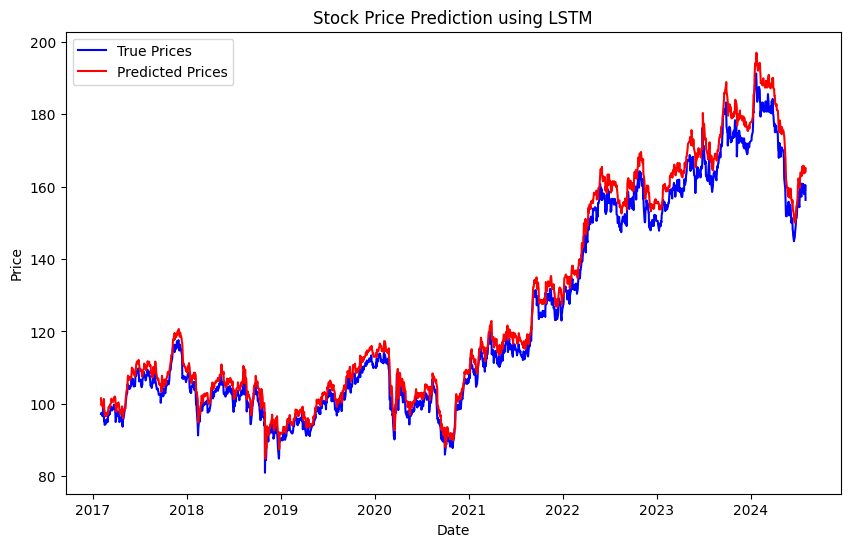

In [62]:
import matplotlib.pyplot as plt

# Plot the true vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(df.index[-len(y_test):], scaler.inverse_transform(np.concatenate([y_test.reshape(-1, 1), np.zeros((len(y_test), len(features)-1))], axis=1))[:, 0], color='blue', label='True Prices')
plt.plot(df.index[-len(predictions):], predicted_prices, color='red', label='Predicted Prices')
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [63]:
actual_prices = scaler.inverse_transform(np.concatenate([y_test.reshape(-1, 1), np.zeros((len(y_test), len(features)-1))], axis=1))[:, 0]

In [64]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculate Mean Squared Error
mse = mean_squared_error(actual_prices, predicted_prices)
# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
# Calculate Mean Absolute Error
mae = mean_absolute_error(actual_prices, predicted_prices)
# Calculate R-squared (coefficient of determination)
r2 = r2_score(actual_prices, predicted_prices)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R-squared: {r2}')


MSE: 16.983417064819882
RMSE: 4.121094158693766
MAE: 3.58368282162193
R-squared: 0.9789093413963871


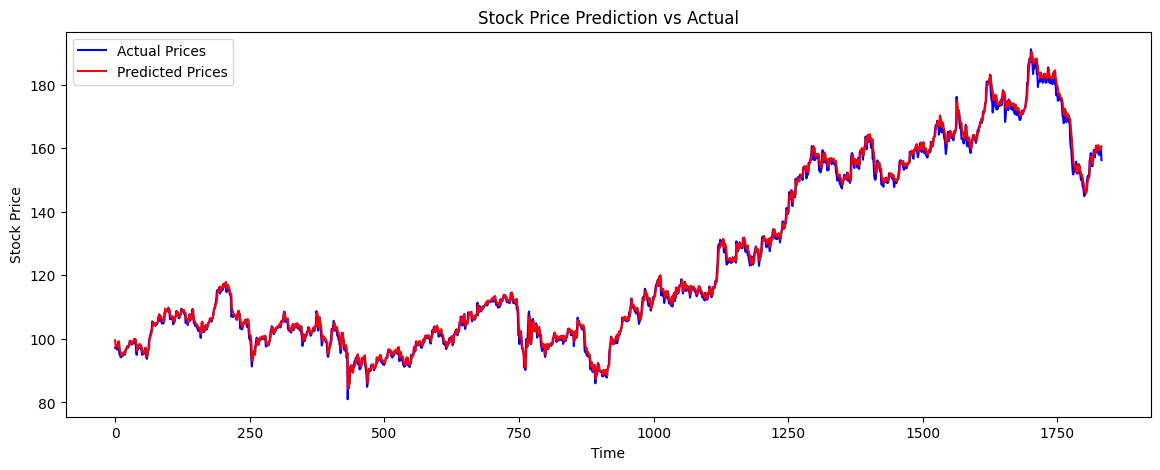

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(actual_prices, color='blue', label='Actual Prices')
plt.plot(predicted_prices, color='red', label='Predicted Prices')
plt.title('Stock Price Prediction vs Actual')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()